# Excercise 4.2 : Quadratic equations

In [1]:
import numpy as np
from math import sqrt 
import matplotlib.pyplot as plt

In [2]:
def solve_quadratic_1(a, b, c):
    """
    returns the solutions of ax^2 + bx + c = 0 
    using the formula x = (-b \pm sqrt(b^2-4ac))/2a
    """
    s1 = (-b + sqrt(b**2 - 4*a*c))/(2*a)  
    s2 = (-b - sqrt(b**2 - 4*a*c))/(2*a)  
    return s1,s2 

def solve_quadratic_2(a, b, c):
    """
    returns the solutions of ax^2 + bx + c = 0 
    using the formula x = 2c/(-b \mp sqrt(b^2-4ac))
    """
    s1 = 2*c/(-b - sqrt(b**2 - 4*a*c)) 
    s2 = 2*c/(-b + sqrt(b**2 - 4*a*c)) 
    return s1,s2 

__Consider the solutions of 0.001x^2 + 1000x + 0.001 = 0.__  

__Task 1:__  
Solve the quadratic equation analytically, and find the expected values of the solutions (in 64 bit floating point precision) assuming that  no loss of significance happens. 

__Task 2:__  
Estimate how much loss of significance will occur for numerical solutions of the quadratic equations when we use solve_quadratic_1 or solve_quadratic_2.  

__Task 3:__  
Write down a function to numerially solve an arbitrary quadratic equation that is not affected by significance digit loss. 

First, let us draw the parabola anyway

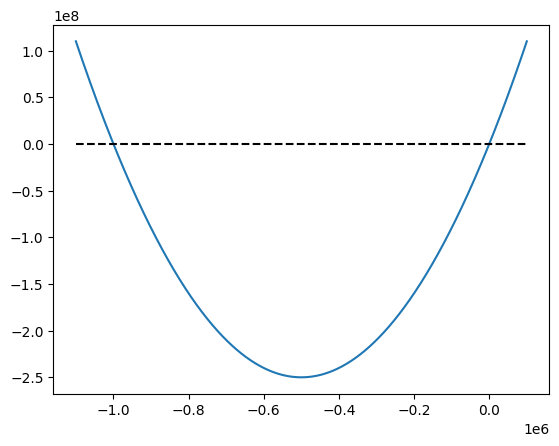

In [3]:
x = np.linspace(-1100000,100000, 1000)
y = 1e-3*x**2 + 1e3*x + 1e-3
plt.plot(x,y)
plt.plot(x,np.zeros_like(x), 'black', ls='--')
plt.show()

## Task 1 :  
Solve the quadratic equation analytically, and find the expected values of the solutions (in 64 bit floating point precision) assuming that  no loss of significance happens. 

The solutions of 0.001x^2 + 1000x + 0.001 = 0 are, using the standard formula,  
$x = \frac{1}{2}(-10^6 \pm \sqrt{10^{12}-4})$  
Using the Taylor expansion,  
$\sqrt{10^{12}-4} = 10^6 - 2*10^{-6}$,  
where we omit the remainder term because it has the order of $10^{-24}$ compared to the leading term $10^6$ and thus we do not have to care it within 64 bit double precision (which has about 16 significance digits).   
Thus, the solutions are  
$x = \frac{1}{2}(-10^6 \pm (10^6 - 2*10^{-6}))$  
If no loss of significance happens, we can perform the addition and subtraction associatively (i.e. with free order), so  
$x = -10^{-6}, -10^6+10^{-6}$  
for greater and lesser solution, respectively.  

## Task 2:  
Estimate how much loss of significance will occur for numerical solutions of the quadratic equations when we use solve_quadratic_1 or solve_quadratic_2.

In the case of solve_quadratic_1, the solutions are  
$x = \frac{1}{2}(-10^6 \pm (10^6 - 2*10^{-6}))$.      
In $10^6 - 2*10^{-6}$, loss of significance happens for $2*10^{-6}$;  only about 16-(6+6)=4 digits remain siginificant for $2*10^{-6}$.   For the lesser solution (choosing the lower sign of $\pm$), since $10^6 - 2*10^{-6}$ is only added to $10^6$, the loss of significance in $2*10^{-6}$ does not affect the total result.  On the other hand, for the greater solution, since $10^6$ in $10^6 - 2*10^{-6}$ is subtracted afterwards, the loss of significance in $2*10^{-6}$ has high impact.  

In fact, 

In [4]:
solve_quadratic_1(0.001, 1000, 0.001)

(-9.999894245993346e-07, -999999.999999)

where the greater solution matches the analytical value, $-10^{-6}$, with only about 4 digits, as expected.   

In the case of solve_quadratic_2, the solutions are  
$x = \frac{2*10^{-3}}{-10^6 \mp (10^6 - 2*10^{-6})}$  
Ths story is opposite compared to the case of solve_quadratic_1 : in this case, the lesser solution loses accuracy due to the loss of significance in $2*10^{-6}$.  

In fact, 

In [5]:
solve_quadratic_2(0.001, 1000, 0.001)

(-1.000000000001e-06, -1000010.5755125057)

where the lesser solution matches the analytical value, $-10^6+10^{-6}$, with only about 4 digits, as expected.  

## Task 3:  
Write down a function to numerially solve an arbitrary quadratic equation that is not affected by significance digit loss.  

From the experience of Task 2, we now see that:  

If b>0, use solve_quadratic_2[0] and solve_quadratic_1[1]  
If b<0, use solve_quadratic_1[0] and solve_quadratic_2[1]  
(Here, [0] and [1] means the first and the second component of the returned value, respectively)  

Thus, the following function will not be affected by the loss of significance.  

In [6]:
def solve_quadratic(a,b,c):
    if b>=0:
        return solve_quadratic_2(a,b,c)[0], solve_quadratic_1(a,b,c)[1]
    else:
        return solve_quadratic_1(a,b,c)[0], solve_quadratic_2(a,b,c)[1]

In [7]:
solve_quadratic(0.001, 1000, 0.001)

(-1.000000000001e-06, -999999.999999)

Check other cases:

In [8]:
a, b, c = 1e-2, -1e5, 1e-1
print(solve_quadratic_1(a, b, c)) # since b<0, only the first component is correct
print(solve_quadratic_2(a, b, c)) # since b<0, only the second component is correct
print(solve_quadratic(a, b, c))

(9999999.999999, 9.997165761888027e-07)
(10002835.041630277, 1.0000000000001001e-06)
(9999999.999999, 1.0000000000001001e-06)


In [9]:
a, b, c = -1e-1, 1e3, 1e-5
print(solve_quadratic_1(a, b, c))  # since b>0, only the second component is correct
print(solve_quadratic_2(a, b, c))  # since b>0, only the first component is correct
print(solve_quadratic(a, b, c))

(-9.999894245993346e-09, 10000.000000009999)
(-9.999999999990001e-09, 10000.105755125058)
(-9.999999999990001e-09, 10000.000000009999)
